<a href="https://colab.research.google.com/github/amitadhaye/hotel-booking--EDA/blob/main/Team_notebook_Hotel_Booking_Analysis_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In day to day life plenty of events are happening near to us. This events generates lot of data. Recording the data and analysing the highlighted events proved vital in generating the main characteristics using **stastical graphs** and other data visualization tools like**(python matplotlib, seaborn libraries).

**Exploratory Data Analysis(EDA)**  on Hotel Bookings data wihch is basically present in the form of comma separated value(csv) file. there are many fields that contains different values regarding **Resort Hotel Bookings** and **City Hotel Bookings.**



In this capstone Project we are going to analyze a dataset comprising the demand of hotel bookings. The data set contains booking information for a city hotel and a resort hotel, and includes information such as market segments, cancellation, rate of stay, food ordered, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

**Contents of the Project:**

Installing and importing the required libraries

Data preparation and cleaning

Exploratory analysis and visualization of columns

Explaining the need and outcome of analysis

Summary


**
In this EDA we will perform analysis on  following Quetions :**

1. What is the boookings ration between Resort and City hotels?
2. How many ticket were canceled during booking and after booking?
3. Which month is the most occupied and which is the least occupied?
4. What is % booking for each year?
5. Which market country is contributing max booking?
6. What meal item mostly preferred by customer?
7. what is the price per guest in each booking?
8. Which market segmetns should be targeted for promotion?

**We have to mount drive to access Hotel bookings dataset from specified directory.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import python packages that are frequently used in EDA analysis**

In [ ]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=9b3bc4738cdd5e4a841bd31a27341d82564cd89b1000481c1935cb919b847362
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [ ]:
# pip install pycountry: use this command before running below script.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry as pc
import matplotlib.ticker as mtick
%matplotlib inline
import plotly.express as px 
import folium 
from urllib.request import urlopen
import json

plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = 20,12
sns.set(style = 'darkgrid')

In [ ]:
# load Hotel bookings dataset from mounted google drive.

df=pd.read_csv('/content/drive/MyDrive/Hotel_Bookings_Analysis/Hotel Bookings.csv')
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,dd//mm//yyy
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015,NaN
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01-07-2015,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015,NaN
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02-07-2015,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03-07-2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017,NaN
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017,NaN
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017,NaN
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017,NaN


#copy the content of original dataframe into new dataframe , so that we keep original data set safe to protect from unauthorized changes in dataset 

In [ ]:
# forming copy of original dataset.
hotel_dataframe = df.copy()

We start firt descriptive analysis on given Hotel Bookings dataset, to know brief about dataset and content present in the dataframe.

In [ ]:
# find fisrt 6 rows from hotel dataframe
hotel_dataframe.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,dd//mm//yyy
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,NaN
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,NaN
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015,NaN
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015,NaN


In [ ]:
# find last 6 rows from given data set to know basic arrangement of data present in the dataframe
hotel_dataframe.tail(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,dd//mm//yyy
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,2,Check-Out,06-09-2017,NaN
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017,NaN
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017,NaN
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017,NaN
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017,NaN
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017,NaN


In [ ]:
# get the basic information about columns present in dataframe
hotel_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# show the decriptive short analysis of hotel bookings dataset.
hotel_dataframe.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,dd//mm//yyy
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,0.0
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,NaN
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,NaN
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,NaN
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,NaN
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,NaN
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,NaN


## Data Cleaning

data cleaning is the process of detecting and correcting corrupt or inaccurate records from a Hotel Bookings Dataframe and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

**Dealing with missing vlaues : check if our dataset contains any null values**

In [ ]:
# Find the missing value, show the total null values for each column and sort it in descending order
hotel_dataframe.isnull().sum().sort_values(ascending = False)[0:7]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
booking_changes            0
dtype: int64

#We have five columns with missing values : we just replace with some value

In [ ]:
# fill null values of column with 0
hotel_dataframe[['dd//mm//yyy']] = hotel_dataframe[['dd//mm//yyy']].fillna(0)

Children column contains the count of children, so we will replace all the missing values with the rounded mean value.

And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often.

In [ ]:
## For the missing values in the country column, replace it with mode (value that appears most often) where df_original_data is a dataframe of original csv data.
hotel_dataframe['country'].fillna(df.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
hotel_dataframe['children'].fillna(round(df.children.mean()), inplace=True)

# **Exploratory Data Analysis**

1. What is the boookings ratio between Resort and City hotels?

To calculate the ratio of Resort and City hotels i have created a method to get bookings ratio.
method will take column name as first parameter and limit is also another parameter.

In [ ]:
def get_counts(series, limit = None):

  '''
   INPUT:
      series: Pandas Series (Single Column from DataFrame)
      limit:  If value given, limit the output value to first limit samples.
  OUTPUT:
      unique_values = Unique values = p
      count_of_unique_values = Count of unique values = q
  '''

  if limit != None:
    series = series.value_counts()[:limit]

  else:
    series = series.value_counts()

  p = series.index
  q = (series)/(series.sum() ) * 100

  return p.values, q.values     

This function takes series or a data frame column as input and return two arrays p and Q Where:

P is Unique values and q is percentage value of each unique value.


# Lets call predefined funbction

In [ ]:
p, q = get_counts(hotel_dataframe['hotel'])
p,q

(array(['City Hotel', 'Resort Hotel'], dtype=object),
 array([66.44610101, 33.55389899]))

In [ ]:
room_type_df = dict (df['reserved_room_type'].value_counts()[:6])
room_type = list(room_type_df.keys())
room_type_booking_counts = list(room_type_df.values())
room_type_booking_counts

[85994, 19201, 6535, 2897, 2094, 1118]

Text(0, 0.5, 'Room Wise Frquency')

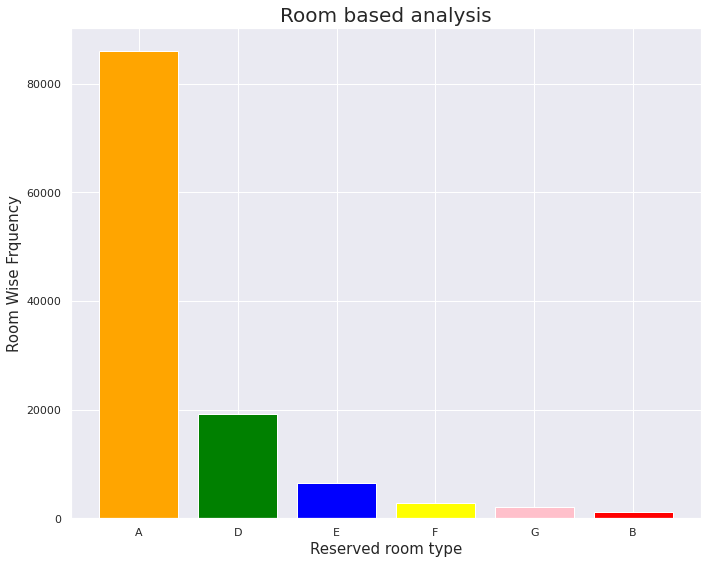

In [ ]:
# graphical representation of reserved room type data column

# resizing bargarph
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

colors = ['orange','green','blue', 'yellow', 'pink', 'red']
plt.bar(room_type, room_type_booking_counts, color=colors)
plt.title('Room based analysis', fontsize=20)
plt.xlabel('Reserved room type', fontsize=15)
plt.ylabel('Room Wise Frquency', fontsize = 15)



([<matplotlib.patches.Wedge at 0x7fdea71d8f90>,
 [Text(-0.9007353992630418, -0.7928907494191422, 'A'),
  Text(1.112285328700516, 0.45035691130211936, 'D'),
  Text(0.5752641477715138, 1.0531244752111282, 'E'),
  Text(0.2951384373412796, 1.1631394167526727, 'F'),
  Text(0.13821821738250104, 1.192013307133609, 'G'),
  Text(0.035761913788027254, 1.1994670005974395, 'B')],
 [Text(-0.525428982903441, -0.46251960382783286, '73.0%'),
  Text(0.6488331084086344, 0.2627081982595696, '16.3%'),
  Text(0.33557075286671634, 0.6143226105398247, '5.5%'),
  Text(0.17216408844907977, 0.6784979931057258, '2.5%'),
  Text(0.08062729347312561, 0.6953410958279386, '1.8%'),
  Text(0.02086111637634923, 0.6996890836818396, '0.9%')])

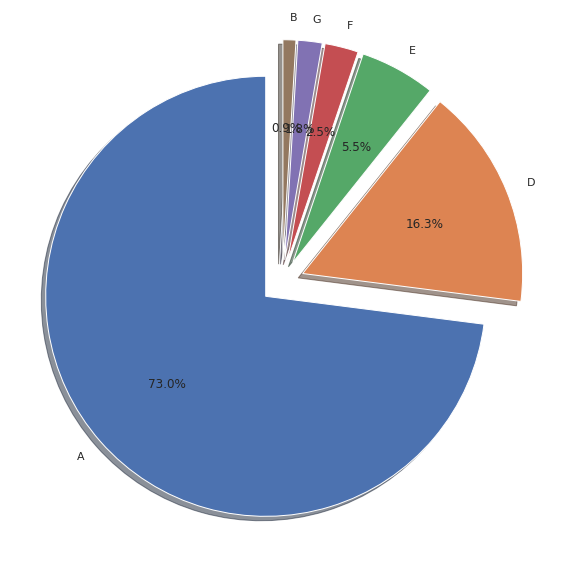

In [ ]:
# resizing pie chart
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)

exploda = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(room_type_booking_counts, autopct='%1.1f%%', explode = exploda,shadow = True,startangle=90, labels = ['A', 'D', 'E', 'F', 'G', 'B'])

In [ ]:
# another method gfor above problem.
import operator
extracted_max_agent = dict(sorted(max_agent.items(), key=operator.itemgetter(1), reverse=True) [:5])
agent_name = extracted_max_agent.keys()
agent_counts = extracted_max_agent.values()

# There are two unique value in hotel coulmn 'City Hotel' and 'Resort Hotel' percentage booking of city hotel is 66.4075 and Resort hotel is 33.595


Graphical representation of ratio of City and Resort Hotel is as below

Text(0.5, 1.0, 'Hotel Booking Comparision')

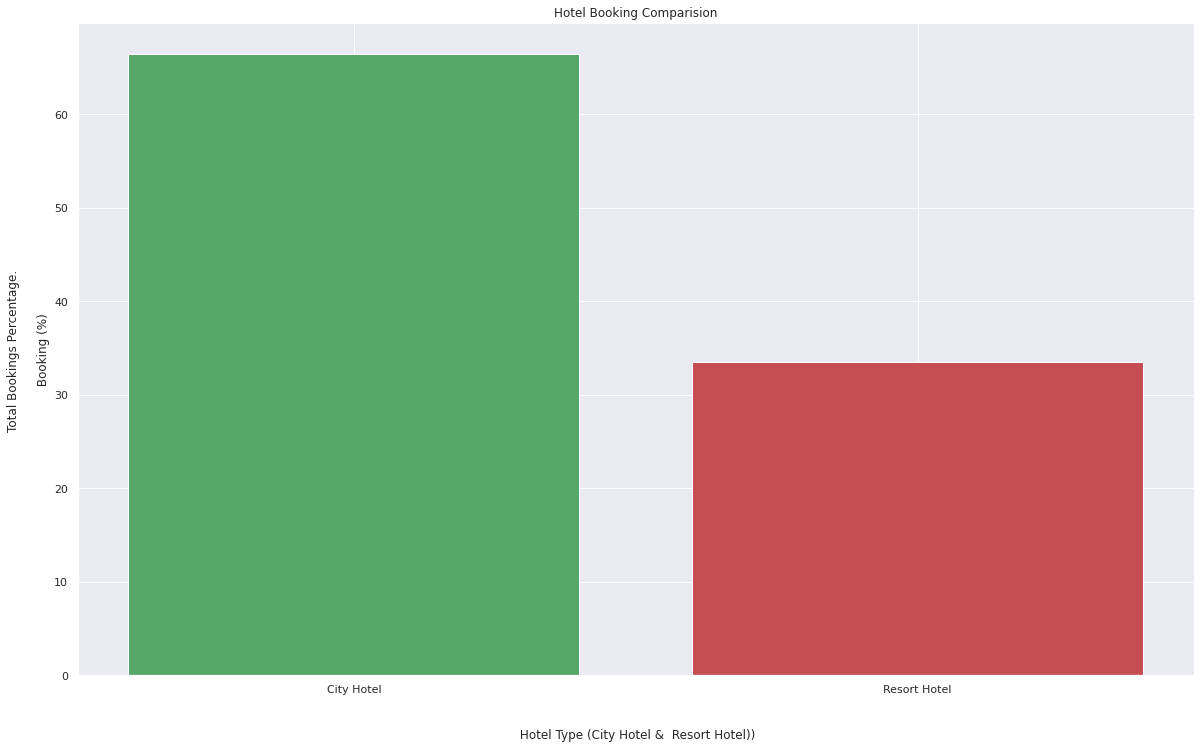

In [ ]:
# using bar graph method from  matplotlib package we represented following graph
plt.bar(p,q, color =['g', 'r'])
plt.xlabel('\n\n Hotel Type (City Hotel &  Resort Hotel))')
plt.ylabel('Total Bookings Percentage. \n\n Booking (%) ')
plt.title('Hotel Booking Comparision')

Text(0, 0.5, 'Total Booking %')

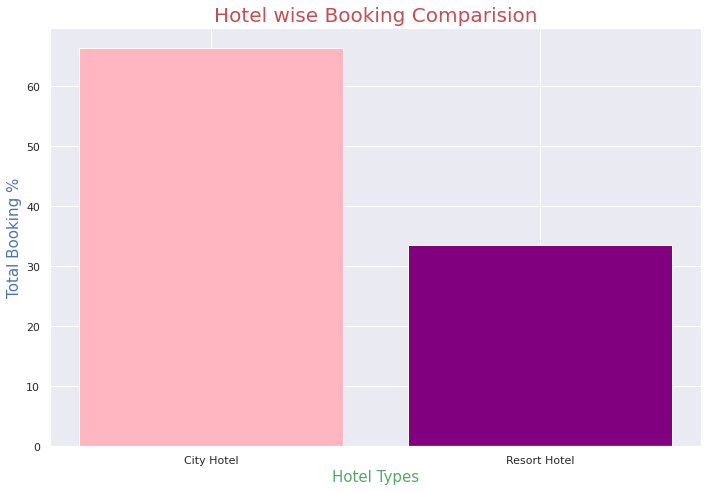

In [ ]:
# plotting a bar plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# plotting a bar graph after resizing with and height of bargraph

plt.bar(p,q,color=['lightpink','purple'])
plt.title('Hotel wise Booking Comparision', fontsize= 20, color='r')
plt.xlabel('Hotel Types', fontsize= 15, color = 'g')
plt.ylabel('Total Booking %', fontsize =15, color  ='b')


Text(0.5, 1.0, 'Percentage booking of hotel')

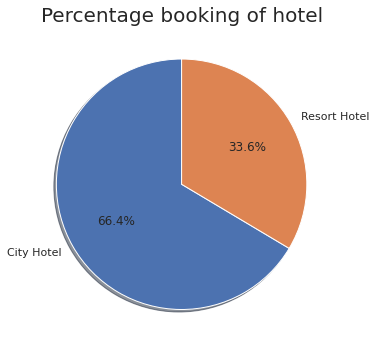

In [ ]:

plt.pie(q, autopct='%1.1f%%',shadow = True,startangle=90, labels =['City Hotel', 'Resort Hotel'])
plt.title('Percentage booking of hotel', fontsize=20)

# **More than 60% of the population booked the City hotel**

**2. How many ticket were canceled during booking and after booking?**

**is_canceled column have two unique values: 1 if booking got canceled, else 0.**

Now let’s plot this result. I will write another function to plot the diagram. The good thing about writing function is that we can reuse the code again and again

In [ ]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

This function takes two arrays, x, and y and displays the required diagram. The default plot type is a bar plot, but it can also plot the line plot. Optional arguments can be given to display title and labels.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


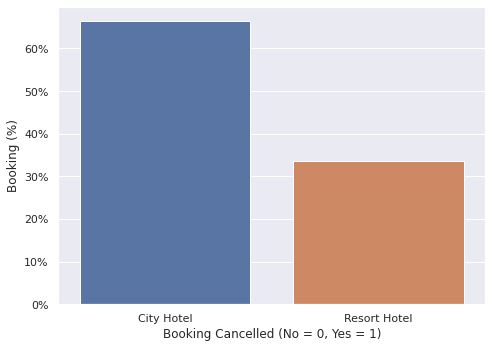

In [ ]:
# now lets call the function
x, y = p, q
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

**Bookings got canceled 37% of the time. While booking guest did checkd-in (did 
not cancel the booking ) almost 63% of the time.**

The hotel booking is generalised activity which involves the cancellation, stay in weed days and weekends. It involves different waiting times for different hotels. Thus, the bar chart below proposes the average number of cancellation, stays in weekdays and weekends, and waiting time in days for two categories of hotels.  

Text(0, 0.5, 'Number of bookings')

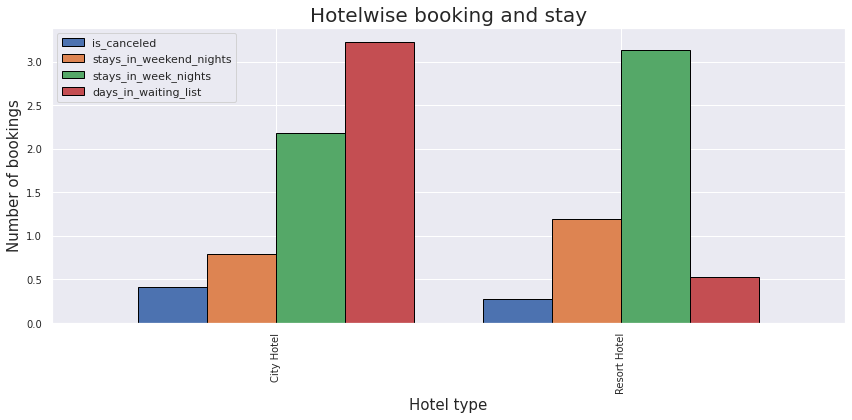

In [ ]:
ax = df.groupby(['hotel'])[['is_canceled','stays_in_weekend_nights','stays_in_week_nights','days_in_waiting_list']].mean().plot.bar(
    width=0.8,                                                                  
    linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10,
)

ax.set_title("Hotelwise booking and stay", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Hotel type", fontsize = 15)
ax.set_ylabel("Number of bookings", fontsize = 15)

It appears that City Hotel has more reservations than Resort Hotel and I believe that is also the reason why it has more cancellations as well. The stays in weeknights and weekened nights are more in resort hotel than city hotel. The waiting time in city hotel is more than resort hotel.

The data in hand consist of bookings data for all months in year 2015,2016 and 2017. So, it is worth noting the percentage mix of monthwise bookings. This chart may help to identify the most preffered month for booking. 

In [ ]:
month_booking = df["arrival_date_month"]
month_booking = df["arrival_date_month"].value_counts()
month_booking

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

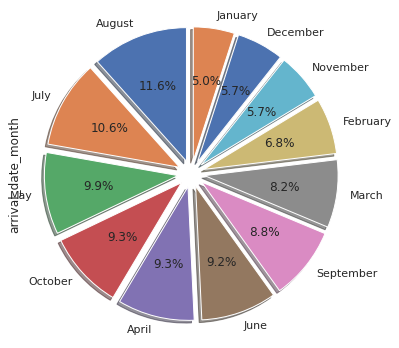

In [ ]:
exploda = (0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
month_booking.plot(kind='pie', autopct='%1.1f%%', explode = exploda,shadow = True,startangle=90)

**3. Which month is the most occupied and which is the least occupied?**

In [ ]:
month_wise_counts = df['arrival_date_month'].value_counts(ascending = False)

month_wise_counts_dict = dict(month_wise_counts)

month_name = month_wise_counts_dict.keys()
booking_counts = month_wise_counts_dict.values()
month_name = list(month_name)
booking_counts = list(booking_counts)


Text(0, 0.5, '\n \nBooking Quantity')

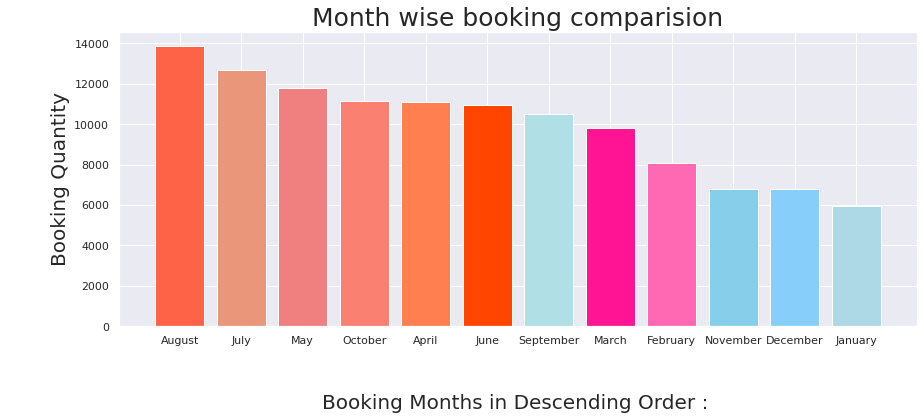

In [ ]:
# bargarh representation of month wise booking 

# plotting a bar plot after changing it's width and height
f = plt.figure()
f.set_figwidth(13)
f.set_figheight(6)

# declaring name of the colors
colors = ['tomato', 'darksalmon', 'lightcoral', 'salmon', 'coral', 'orangered', 'powderblue', 'deeppink', 'hotpink',
          'skyblue', 'lightskyblue', 'lightblue']
# plotting the bargarph for monthwise hotel bookings          
plt.bar(month_name, booking_counts, color = colors)

# set the title, x_label, y_label for bargraph

plt.title('Month wise booking comparision', fontsize=25)
plt.xlabel('\n\nBooking Months in Descending Order : ' , fontsize = 20)
plt.ylabel('\n \nBooking Quantity', fontsize = 20)


## August month has more booking request as compare to other. january month has cheaper booking

**4.What is Hotel Booking % for each year?**

The data in hand consist of bookings data for year 2015,2016 and 2017. So, it is worth noting the trend of yearwise bookings. This trend may help to forecast the future demand. 

In [ ]:
# Year wise booking counts 

hotel_booking_for_each_year =dict (df['arrival_date_year'].value_counts(ascending= False))
years = list(hotel_booking_for_each_year.keys())
year_wise_booking_counts =list(hotel_booking_for_each_year.values())


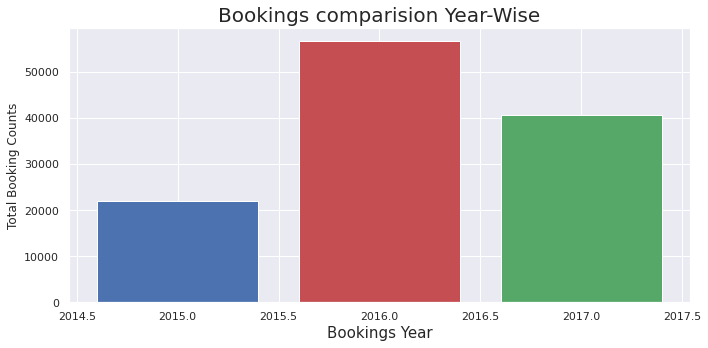

<Figure size 720x288 with 0 Axes>

In [ ]:
# graphical representation: booking count for each year 

# title, xlabel and ylabel

plt.title('Bookings comparision Year-Wise', fontsize =20)
plt.xlabel('Bookings Year' , fontsize= 15)
plt.ylabel('Total Booking Counts')

# Bargraph Representation
plt.bar(years,year_wise_booking_counts, color = ['r', 'g', 'b'])

# resizing bargarph
bar_f = plt.figure()
bar_f.set_figwidth(10)
bar_f.set_figheight(4)

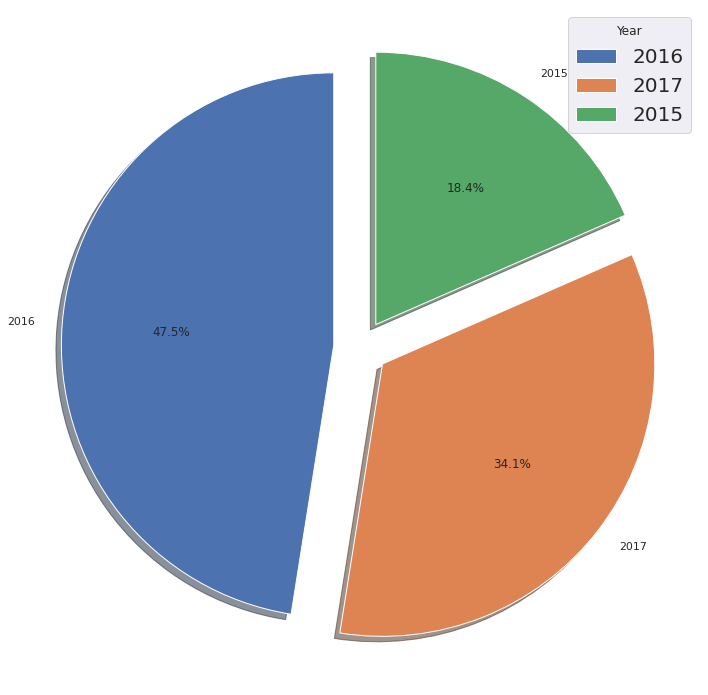

In [ ]:
# Year wise pie chart Representation 
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
exploda = (0.1, 0.1, 0.1)
plt.pie(year_wise_booking_counts, labels = years, autopct='%1.1f%%', explode=exploda, shadow=True, startangle=90)
plt.legend(title='Year', fontsize=20)


##Year 2016 has maximum booking where year 2015 has minimum hotel bookings 

**5. Which market country is contributing max booking?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


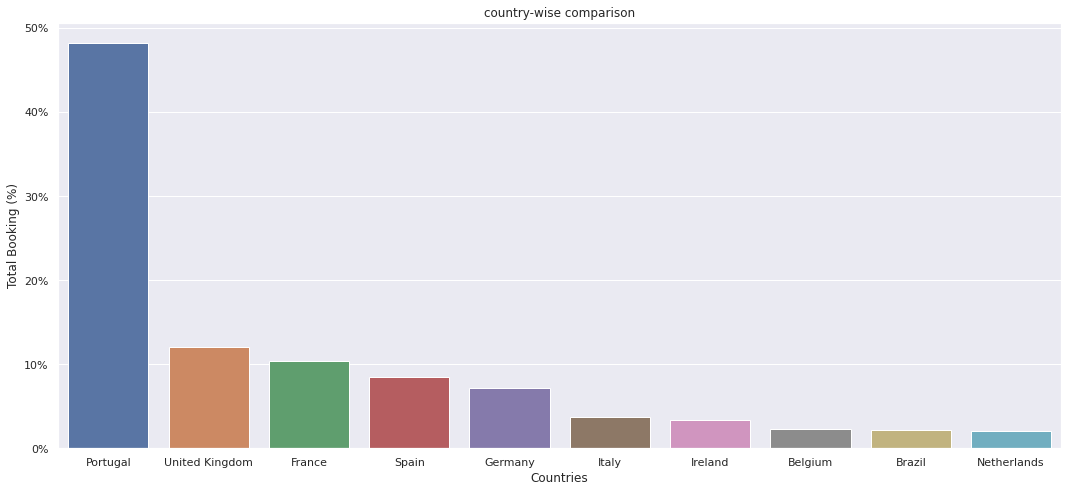

In [ ]:
import pycountry as pc
# len(pycountry.countries)
x,y = get_counts(df['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))


In [ ]:
countrywise_booking = df["country"].value_counts()[:10]
countrywise_booking

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

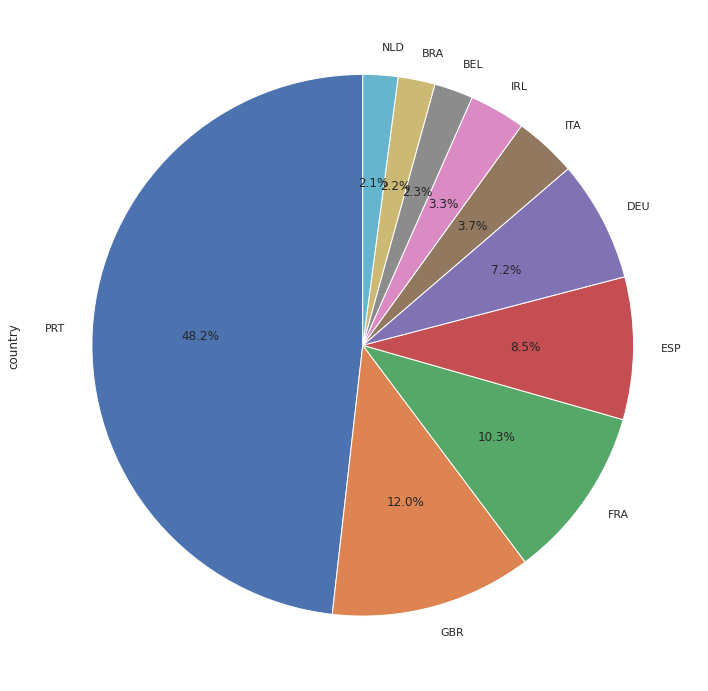

In [ ]:
countrywise_booking.plot(kind='pie', autopct='%1.1f%%',startangle=90)

##According to data , We can see that 'Portugal' and 'United Kingdom' have more bookings as compare to other countries.

##We will have to target these countries to increase the bookings for both hotel City and Resort .

The bookings at the hotel comprises of stay at nights, thus needs meal. The following pie chart presents the percentage of each food type preffered in each booking.

In [ ]:
meal_booking_cat = df["meal"].value_counts()
meal_booking_cat

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

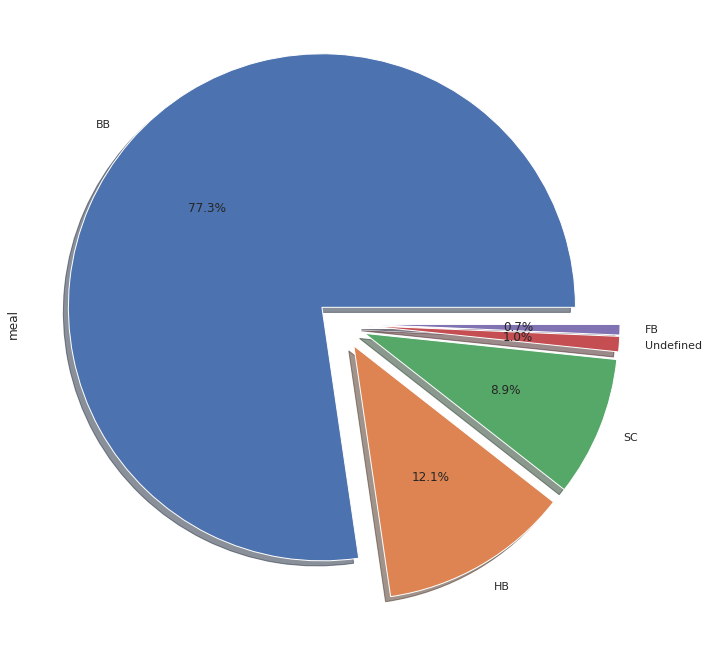

In [ ]:
exploda = (0.1, 0.1, 0.1, 0.1, 0.1)
meal_booking_cat.plot(kind='pie', autopct='%1.1f%%', explode = exploda,shadow = True)

In [ ]:
mostly_prefered_items = dict (df['meal'].groupby(df['meal']).count().sort_values(ascending=False))
items_name = list(mostly_prefered_items.keys() )
item_counts = list(mostly_prefered_items.values())

mostly_prefered_items

{'BB': 92310, 'FB': 798, 'HB': 14463, 'SC': 10650, 'Undefined': 1169}

BB means Bed and Breakfast
HB means half board : in which breakfast and dinner are included.
FB means full board


Text(0, 0.5, 'Meal Name')

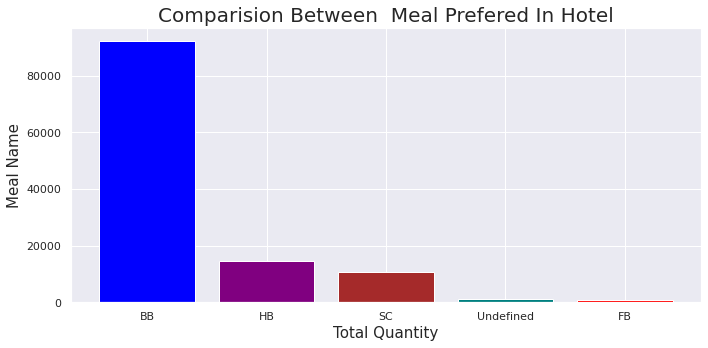

In [ ]:
# Pie Chart for mostly prefered meal

# # plotting figure size
# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(10)
meal_name = ['BB means Bed and Breakfast', 'HB means half board : in which breakfast and dinner are included.', 'FB means full board']
for meal in meal_name:
  print(meal)
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
colors = ['blue', 'purple','brown','teal', 'red']
plt.bar(items_name, item_counts, color=colors)

# title, xlabel and y_label
plt.title('Comparision Between  Meal Prefered In Hotel', fontsize= 20)
plt.xlabel('Total Quantity', fontsize=15)
plt.ylabel('Meal Name', fontsize=15)


Market segmentation analysis is very essential for any business. One can not only identify the performing segment but also non-performing segment,thus upgrade it. Online TA is identified as largest contributor amongst all.

In [ ]:
market_segment_cat = df["market_segment"].value_counts()
market_segment_cat

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

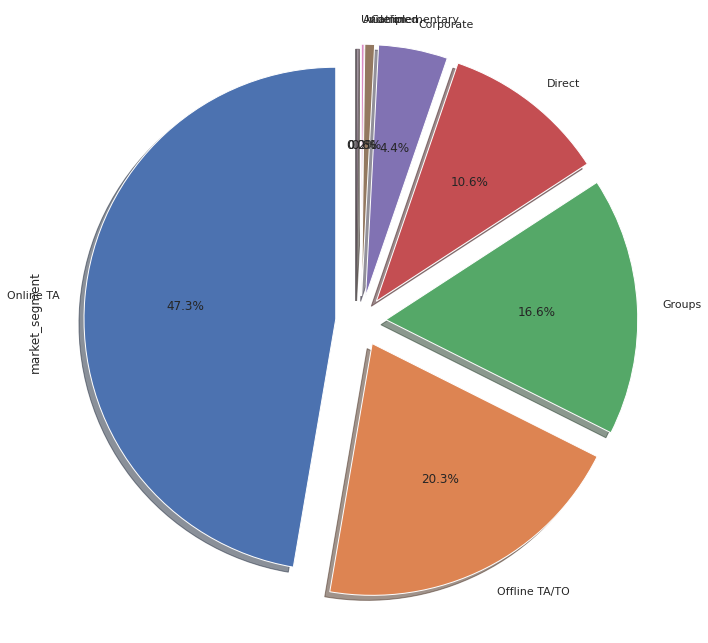

In [ ]:
exploda = (0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1)
market_segment_cat.plot(kind='pie', autopct='%1.1f%%', explode = exploda,shadow = True,startangle=90)

ADR stands for average daily rate, and it's used to measure the average revenue that a hotel receives for each occupied guest room per day. This feature is important in the upgradation of business plan in near future.

**6.What item mostly preferred by customer?**

In [ ]:
mostly_prefered_items = dict (df_not_canceled['meal'].groupby(df_not_canceled['meal']).count().sort_values(ascending=False))
items_name = list(mostly_prefered_items.keys() )
item_counts = list(mostly_prefered_items.values())

mostly_prefered_items

{'BB': 57730, 'FB': 320, 'HB': 9475, 'SC': 6603, 'Undefined': 883}

BB means Bed and Breakfast
HB means half board : in which breakfast and dinner are included.
FB means full board


Text(0, 0.5, 'Meal Name')

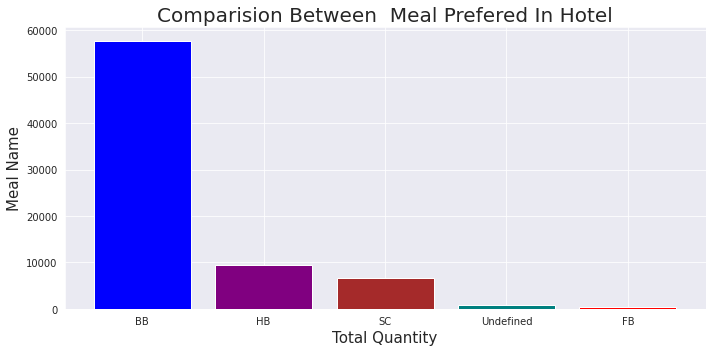

In [ ]:
# Pie Chart for mostly prefered meal

# # plotting figure size
# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(10)
meal_name = ['BB means Bed and Breakfast', 'HB means half board : in which breakfast and dinner are included.', 'FB means full board']
for meal in meal_name:
  print(meal)
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True
colors = ['blue', 'purple','brown','teal', 'red']
plt.bar(items_name, item_counts, color=colors)

# title, xlabel and y_label
plt.title('Comparision Between  Meal Prefered In Hotel', fontsize= 20)
plt.xlabel('Total Quantity', fontsize=15)
plt.ylabel('Meal Name', fontsize=15)


Market segmentation analysis is very essential for any business. One can not only identify the performing segment but also non-performing segment,thus upgrade it. Online TA is identified as largest contributor amongst all.


**7. Which market segmetns should be targeted for promotion?**

In [ ]:
market_segment_cat = df["market_segment"].value_counts()
market_segment_cat

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

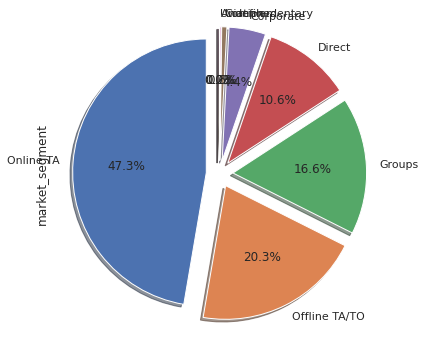

In [ ]:
exploda = (0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1)
market_segment_cat.plot(kind='pie', autopct='%1.1f%%', explode = exploda,shadow = True,startangle=90)

ADR stands for average daily rate, and it's used to measure the average revenue that a hotel receives for each occupied guest room per day. This feature is important in the upgradation of business plan in near future.

**8. what is the price per guest in each booking?**

In [ ]:
df1 = df[df['adults'] != 0]

In [ ]:
df1 = df[df['adr'] > 0.00]
df1.shape

(117430, 32)

In [ ]:
reservations_not_cancelled = df[df['is_canceled'] == 0]
reservations_not_cancelled.shape

(75166, 32)

In [ ]:
reservations_not_cancelled['Total Guests'] = reservations_not_cancelled['adults'] + reservations_not_cancelled['children'] + reservations_not_cancelled['babies']
reservations_not_cancelled['price_per_guest'] = reservations_not_cancelled['adr']/(reservations_not_cancelled['adults'] + reservations_not_cancelled['children'] + reservations_not_cancelled['babies'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
reservations_not_cancelled['price_per_guest']

0          0.000000
1          0.000000
2         75.000000
3         75.000000
4         49.000000
            ...    
119385    48.070000
119386    75.143333
119387    78.855000
119388    52.200000
119389    75.600000
Name: price_per_guest, Length: 75166, dtype: float64

It is very interesting to know the revenue earned by various hotel categories for years under considerations. The box plot below gives inside about the above mentioned relationship.

In [ ]:
px.box(reservations_not_cancelled, x = "arrival_date_year", y = "price_per_guest", color = "hotel")

The meaning of the categories in the meal column:

BB: Bed & Breakfast
HB:: Half board (breakfast and one other meal – usually dinner)
FB: Full board (breakfast, lunch and dinner)
Undefined/SC: no meal package
Bed & Breakfast is the most common option among the customers.
The box plot below presents the effect of type of room and meal type on the final price per guest. Thus, guest can plan the booking optimally considering the individual costs.

In [ ]:
px.box(reservations_not_cancelled, x = "assigned_room_type", y = "price_per_guest", color = "meal")

It will be intresting to see how much the customers coming from various channels pay daily. it can be observed that TA/TO distribution channel is the best performer.

In [ ]:
px.histogram(df, x = "distribution_channel", color = 'is_canceled')

**Which hotel makes more revenue?**

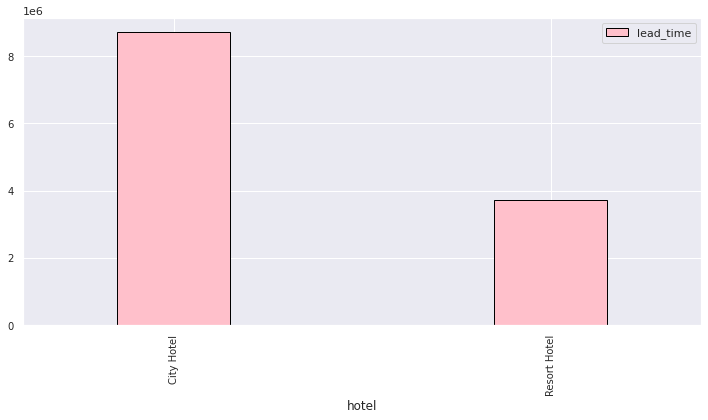

In [ ]:
ax = df.groupby(['hotel'])[['lead_time']].sum().plot.bar(
    width=0.3,                                                                  
    linewidth=1,
    edgecolor='black',
    figsize = (10,6),
    fontsize = 10,
    color=['pink']
)



• City hotel has slightly higher median lead time. Also median lead time is
significantly higher in each case, this means customers generally plan
their hotel visits way to early. **bold text**

**Which** is the most common channel for booking hotels?


In [ ]:
distribution_channel = dict(df['distribution_channel'].value_counts())
channel_name = list(distribution_channel.keys())
channel_counts = list(distribution_channel.values())
distribution_channel

{'Corporate': 6677,
 'Direct': 14645,
 'GDS': 193,
 'TA/TO': 97870,
 'Undefined': 5}

**Pie chart representation of distribution channel**

Text(0.5, 1.0, '\n\nBooking % by distribution channel')

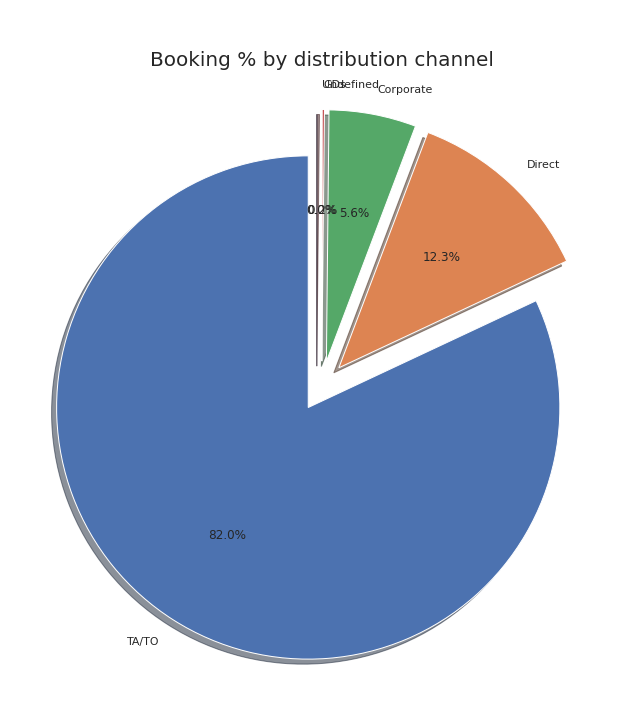

In [ ]:
# resing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
exploda = [0.1, 0.1,0.1, 0.1,0.1]
labels = ('TA/TO', 'Direct', 'Corporate', 'GDs', 'Undefined')
plt.pie(channel_counts,autopct='%1.1f%%', explode = exploda ,shadow = True,startangle=90, labels=labels)
plt.title('\n\nBooking % by distribution channel', fontsize=20)

Text(0.5, 0, 'Distribution Channel Name')

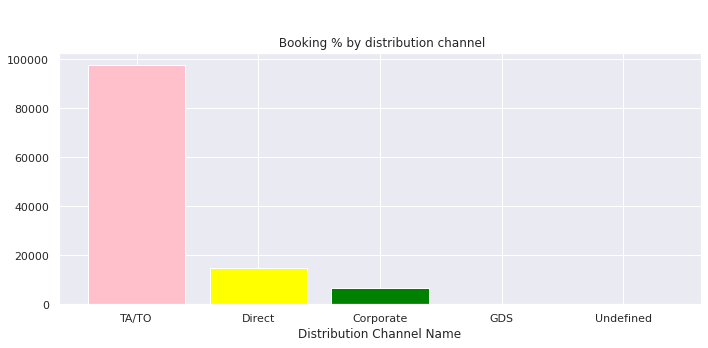

In [ ]:
# bargraph
plt.bar(channel_name, channel_counts, color=['pink', 'yellow', 'green','red', 'purple'])
plt.title('\n \n Booking % by distribution channel')
plt.xlabel('Distribution Channel Name')

Conclusion:
Around 60% bookings are for City hotel and 40% bookings are for Resort hotel, therefore City Hotel is busier than Resort hotel. Also the overall adr of City hotel is slightly higher than Resort hotel.
Mostly guests stay for less than 5 days in hotel and for longer stays Resort hotel is preferred. 
Most of the guests came from european countries, with most no. of guest coming from Portugal. 
 Guests use different channels for making bookings out of which most preferred way is TA/TO. 
For hotels higher adr deals come via GDS channel, so hotels should increase their popularity on this channel. 
Almost 30% of bookings via TA/TO are cancelled. 
Not getting same room as reserved, longer lead time and waiting time do not affect cancellation of bookings. Although different room allotment does lowers the adr. 
July- August are the busier and most profitable  months for both of hotels. 
Within a month, adr gradually increases as month ends, with small sudden rise on weekends. 
 Couples are the most common guests for hotels; hence hotels can plan services according to couples          needs to  increase revenue. 

In this hotel booking EDA, our team has identified the various outliars in different category of fields in the data such as yearwise, monthwise bookings, stay, cancellation and lead time comparisons between two hotel categories, market share of each entity w.r.t cancelled and booked, meal preferences by guest, the price per guest and its relationship to type of room and meal type etc,. This EDA will play important role in identifying various key features in hotel booking demant analysis